In [1]:
import tools
from sklearn import svm
images, data, target = tools.load_data()

In [2]:
scaler, data = tools.scale(data)
pca, feature_reduced_data = tools.reduce(data, 40)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_reduced_data, target, test_size=0.2, random_state=10)

In [4]:
from sklearn.model_selection import GridSearchCV
params = {'C': [pow(10,x) for x in range(-1,3)], 'gamma': [0.01,0.001, 0.0001, 0.00001]}

cv = GridSearchCV(param_grid=params, estimator=svm.SVC(random_state=10), cv=10, n_jobs=-1)
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

print(cv.best_params_)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Train accuracy: 0.9368957637546141
Test accuracy: 0.7983134223471539
{'C': 10, 'gamma': 0.001}


In [5]:
clf = svm.SVC(gamma = 0.001, C=10, probability=True)
clf.fit(X_train, y_train)
print("Train accuracy", clf.score(X_train, y_train))
print("Test accuracy:",clf.score(X_test, y_test))

Train accuracy 0.9368957637546141
Test accuracy: 0.7983134223471539


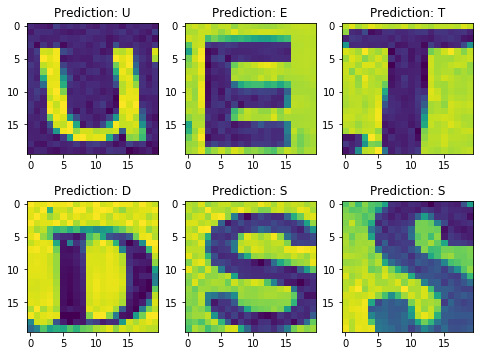

In [6]:
import random
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,3, figsize = (8,6))
img = random.randint(0,7112)
pred = clf.predict([feature_reduced_data[img]])
axs[0,0].set_title('Prediction: ' + pred[0].capitalize())
axs[0,0].imshow(images[img])

img = random.randint(0,7112)
pred = clf.predict([feature_reduced_data[img]])
axs[0,1].set_title('Prediction: ' + pred[0].capitalize())
axs[0,1].imshow(images[img])

img = random.randint(0,7112)
pred = clf.predict([feature_reduced_data[img]])
axs[0,2].set_title('Prediction: ' + pred[0].capitalize())
axs[0,2].imshow(images[img])

img = random.randint(0,7112)
pred = clf.predict([feature_reduced_data[img]])
axs[1,0].set_title('Prediction: ' + pred[0].capitalize())
axs[1,0].imshow(images[img])

img = random.randint(0,7112)
pred = clf.predict([feature_reduced_data[img]])
axs[1,1].set_title('Prediction: ' + pred[0].capitalize())
axs[1,1].imshow(images[img])

img = random.randint(0,7112)
pred = clf.predict([feature_reduced_data[img]])
axs[1,2].set_title('Prediction: ' + pred[0].capitalize())
axs[1,2].imshow(images[img])

plt.show()

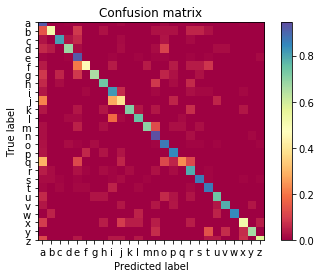

In [7]:
tools.plot_confusion_matrix(y_test, clf.predict(X_test), clf.classes_, "Confusion matrix")